In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
from datetime import datetime 

In [2]:
from hh_requests import *

vacancies_dict = {
    'bim-менеджер':None, 
    'архитектор':[13], 
    'инженер-конструктор':[13], 
    'инженер ПТО':[13], 
    'инженер ОВиК':[13], 
    'инженер ВК':[13], 
    'Главный инженер проекта':[13],
    'курьер': None
    }
current_date_time = datetime.now().strftime("%Y-%m-%d")
df = get_vacancies_df_from_dict(vacancies_dict, [1, 2])
df.to_excel(f'reports/excel/Вакансии_{current_date_time}.xlsx', index=False)

In [3]:
df = pd.read_excel('reports/excel/Вакансии_2025-12-27.xlsx')
df_old = pd.read_excel('reports/excel/Вакансии_2025-10-06.xlsx')

In [4]:
concat_df = pd.concat([df, df_old], ignore_index=True)
concat_df

,Запрос,Дата,Вакансия,Город,Компания,Ссылка,ЗП,Валюта,Требования,Обязанности
0,bim-менеджер,2025-12-27,Главный инженер проекта (ГИП)/Руководитель BIM...,Москва,AEC,https://hh.ru/vacancy/128796474,370000,RUR,Практический опыт BIM-проектирования в Revit M...,Запуск и развитие BIM-направления по инженерны...
1,bim-менеджер,2025-12-27,BIM-менеджер,Москва,Медкон,https://hh.ru/vacancy/128529729,300000,RUR,Высшее техническое образование. - Опыт работы ...,"Координация BIM-моделей по разделам, контроль ..."
2,bim-менеджер,2025-12-27,Главный специалист по BIM (BIM менеджер),Москва,ПРОЦЕССОР,https://hh.ru/vacancy/128838279,250000,RUR,Знание нормативов: Свободное владение российск...,Глубокое понимание концепции построение цифров...
3,bim-менеджер,2025-12-27,BIM-Менеджер / Главный специалист отдела техно...,Санкт-Петербург,Сэтл Строй,https://hh.ru/vacancy/126006458,184000,RUR,"Высшее образование, желательно ПГС, архитектур...",Осуществления контроля разработки проектов в к...
4,bim-менеджер,2025-12-27,BIM координатор КР,Москва,"DARS, группа компаний",https://hh.ru/vacancy/128751728,180000,RUR,Образование: Высшее архитектурное или инженерн...,Разработка и поддержка актуальных компонентов ...
...,...,...,...,...,...,...,...,...,...,...
10384,курьер,2025-10-06,Водитель-курьер на автомобиле компании (м. Сал...,Москва,Перекресток Впрок,https://hh.ru/vacancy/106555273,209000,RUR,"У тебя стаж вождения от 1,5 лет или опыт управ...",Загружать уже собранные заказы в автомобиль. Б...
10385,курьер,2025-10-06,"Курьер на велосипеде (Москва, Варшавское шоссе )",Москва,ВкусВилл,https://hh.ru/vacancy/125156056,150000,RUR,Умение пользоваться приложениями-навигаторами ...,Доставлять товары из магазинов ВкусВилл покупа...
10386,курьер,2025-10-06,Водитель-курьер на личном автомобиле,Москва,TacoLand,https://hh.ru/vacancy/125581709,150000,RUR,"Личный легковой автомобиль. - Ответственность,...",Ограниченный радиус доставки. - Работа через м...
10387,курьер,2025-10-06,Водитель-курьер,Москва,Новиков Александр Дмитриевич,https://hh.ru/vacancy/126049224,267000,RUR,Ответственность и аккуратность. Без опыта можн...,Смартфон с интернетом.


In [6]:
df_count_all = concat_df[
    ((concat_df['Город']=='Санкт-Петербург') | (concat_df['Город']=='Москва'))
    ]

df_selary = df_count_all[
        (
            (df_count_all['ЗП']!=0) &
            (df_count_all['ЗП']<500000)
        )
    ]

df_selary_all = df_selary.copy()
df_selary_all['ЗП'] = df_selary['ЗП']/1000

pivot_mean_salary_all = df_selary_all.pivot_table(
    index='Запрос', 
    columns=['Дата'], 
    values="ЗП",
    aggfunc='mean'
    ).round(1).sort_values('2025-12-27').fillna(0)


pivot_mean_salary_spb = df_selary_all[df_selary_all['Город']=='Санкт-Петербург'].pivot_table(
    index='Запрос', 
    columns=['Дата'], 
    values="ЗП",
    aggfunc='mean'
    ).round(1).sort_values('2025-12-27').fillna(0)

pivot_mean_salary_msk = df_selary_all[df_selary_all['Город']=='Москва'].pivot_table(
    index='Запрос', 
    columns=['Дата'], 
    values="ЗП",
    aggfunc='mean'
    ).round(1).sort_values('2025-12-27').fillna(0)

pivot_count_all = df_count_all.pivot_table(
    index='Запрос', 
    columns=['Дата'], 
    values="ЗП",
    aggfunc='count'
    ).round(1)

pivot_count_spb = df_count_all[df_count_all['Город']=='Санкт-Петербург'].pivot_table(
    index='Запрос', 
    columns=['Дата'], 
    values="ЗП",
    aggfunc='count'
    ).round(1)

pivot_count_msk = df_count_all[df_count_all['Город']=='Москва'].pivot_table(
    index='Запрос', 
    columns=['Дата'], 
    values="ЗП",
    aggfunc='count'
    ).round(1)

pivot_diff = pivot_mean_salary_all.copy()
pivot_diff['Разница %'] = round((pivot_diff['2025-12-27'] - pivot_diff['2025-10-06'])/pivot_diff['2025-12-27']*100, 1)
display(pivot_diff['Разница %'])

Запрос
курьер                      6.7
инженер ПТО                 1.7
bim-менеджер              -14.3
инженер ВК                 -0.1
инженер-конструктор         5.6
архитектор                 -0.5
инженер ОВиК                4.3
Главный инженер проекта    -5.4
Name: Разница %, dtype: float64

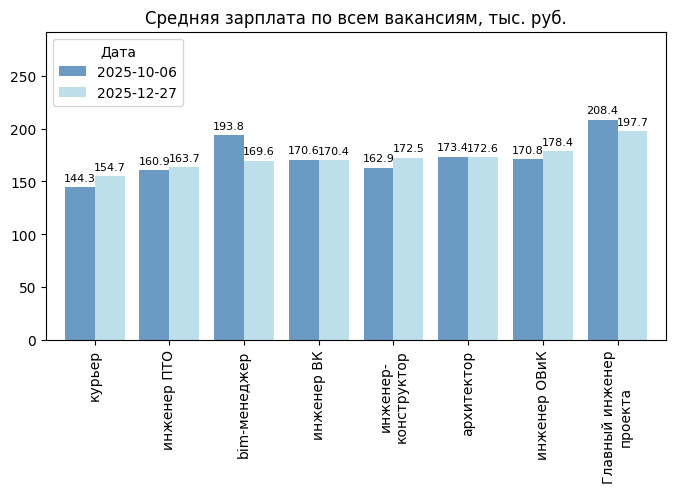

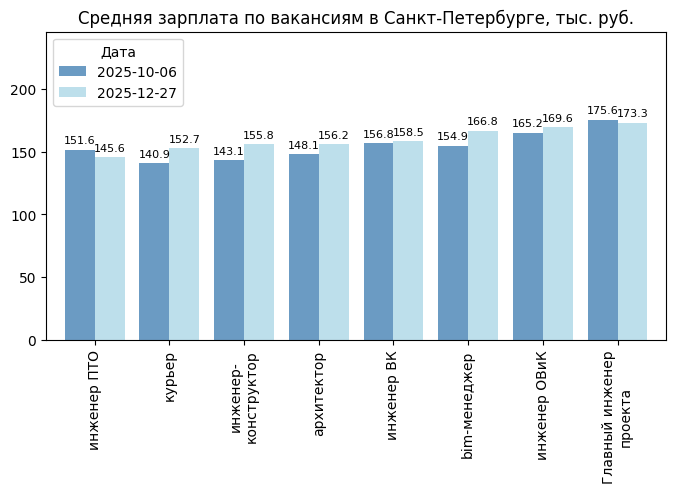

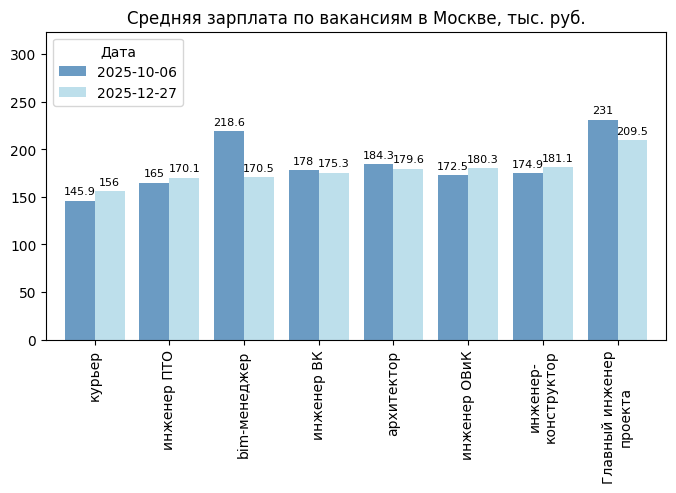

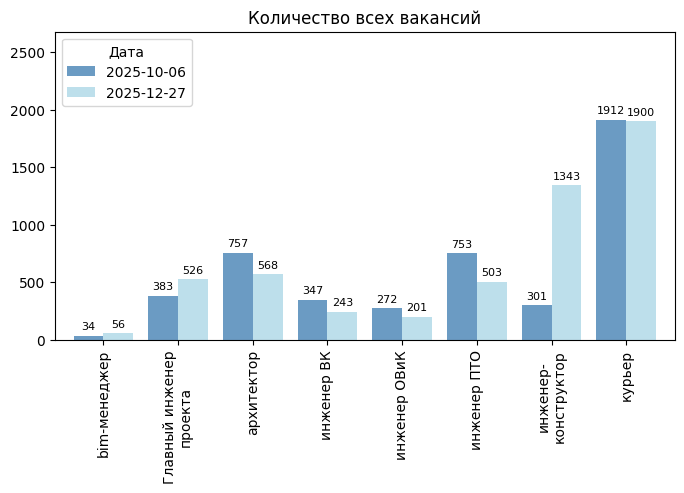

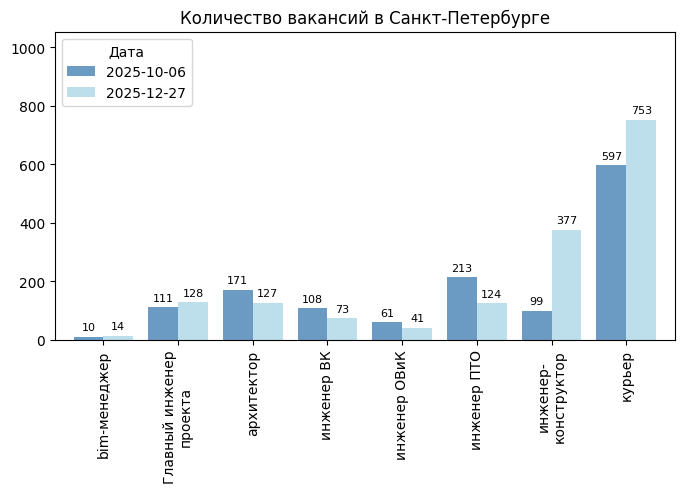

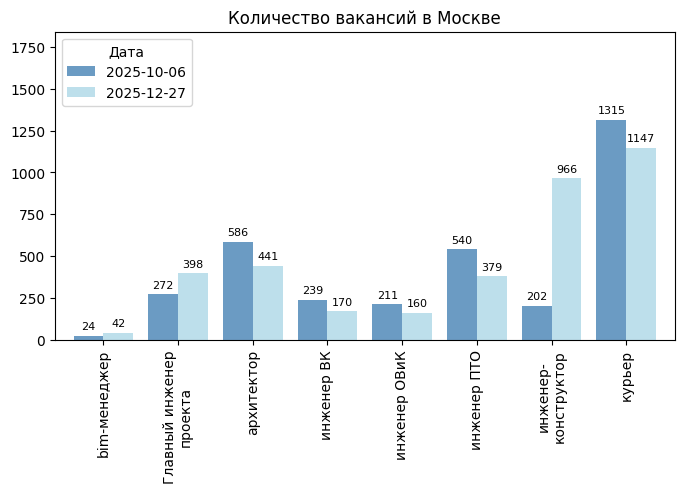

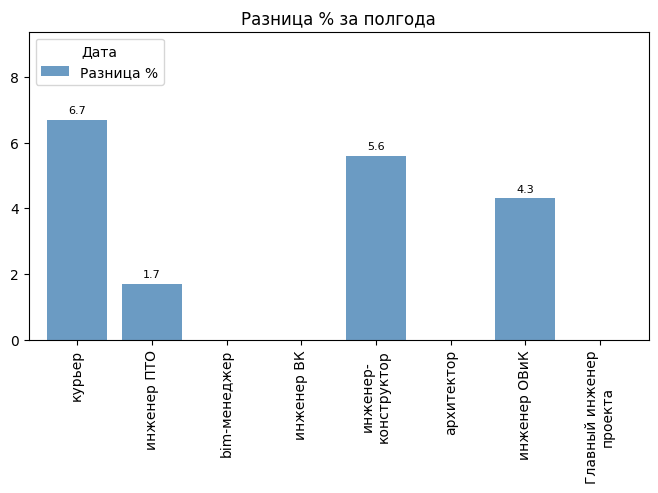

In [7]:
def plot_bar(df, title:str = '', color = ['steelblue', 'lightblue']):
    ax1 = df.plot(
    kind='bar', 
    color=color, 
    width=0.8, 
    alpha=0.8, 
    figsize=(8, 4),
    fontsize=10
    )
    for container in ax1.containers:
        ax1.bar_label(container, label_type='edge', padding=3, fontsize = 8)

    ax1.legend(title='Дата', loc='upper left')
    max_qty = df.values.max()
    ax1.set_ylim(0, max_qty * 1.4)  # +25% сверху
    max_sum = pivot_count_all.values.max()
    plt.title(title)
    labels = [item.get_text() for item in ax1.get_xticklabels()]
    max_width = 15
    wrapped_labels = ['\n'.join(textwrap.wrap(label, width=max_width)) for label in labels]
    ax1.set_xticklabels(wrapped_labels, rotation=90, ha='center')
    ax1.grid(False)
    ax1.set_xlabel(None)
    plt.show()

plot_bar(pivot_mean_salary_all, 'Средняя зарплата по всем вакансиям, тыс. руб.')
plot_bar(pivot_mean_salary_spb, 'Средняя зарплата по вакансиям в Санкт-Петербурге, тыс. руб.')
plot_bar(pivot_mean_salary_msk, 'Средняя зарплата по вакансиям в Москве, тыс. руб.')
plot_bar(pivot_count_all, 'Количество всех вакансий')
plot_bar(pivot_count_spb, 'Количество вакансий в Санкт-Петербурге')
plot_bar(pivot_count_msk, 'Количество вакансий в Москве')
plot_bar(pivot_diff['Разница %'], r'Разница % за полгода', color = 'steelblue')



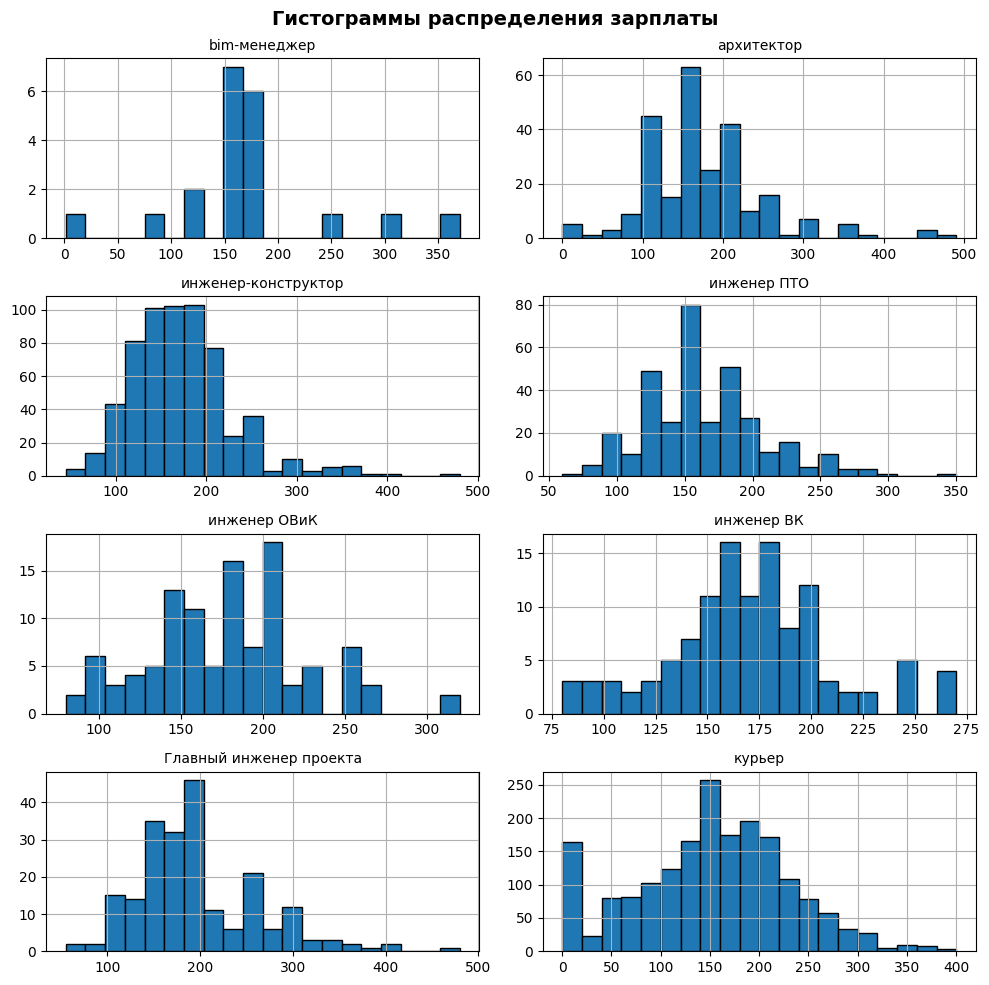

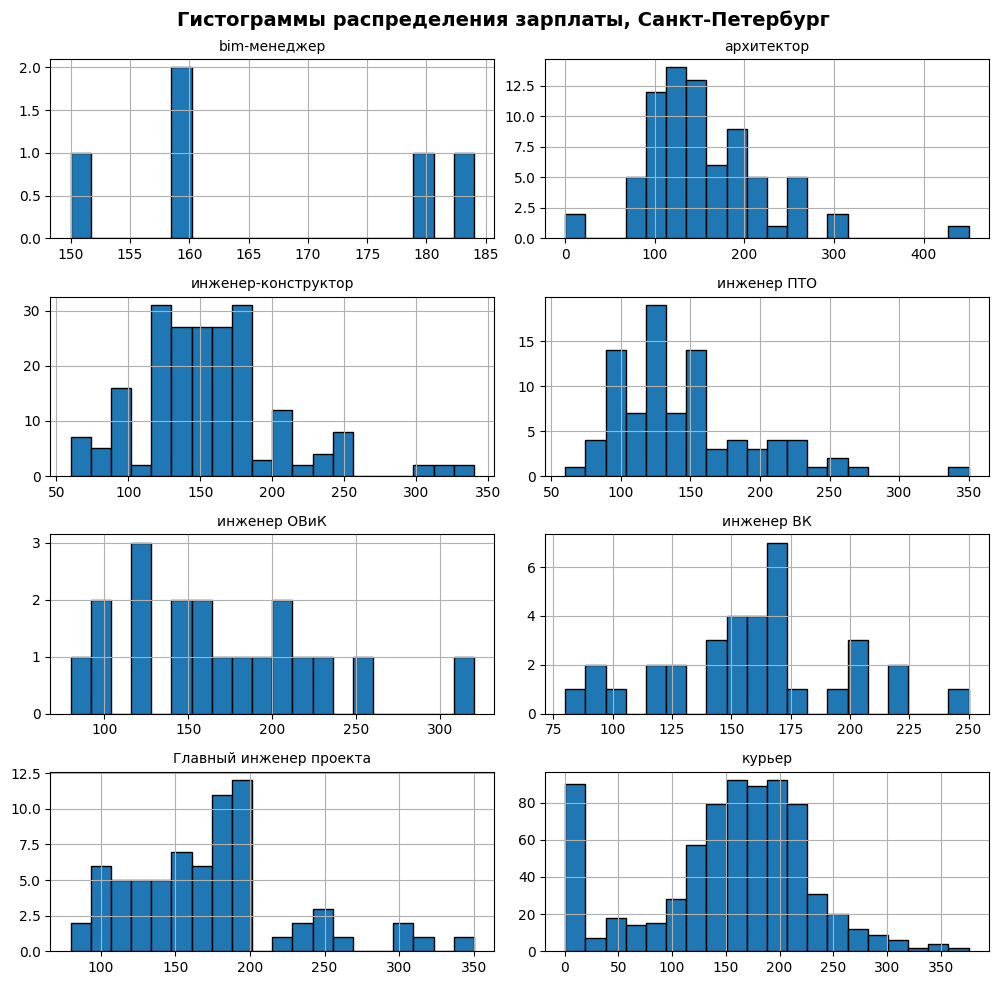

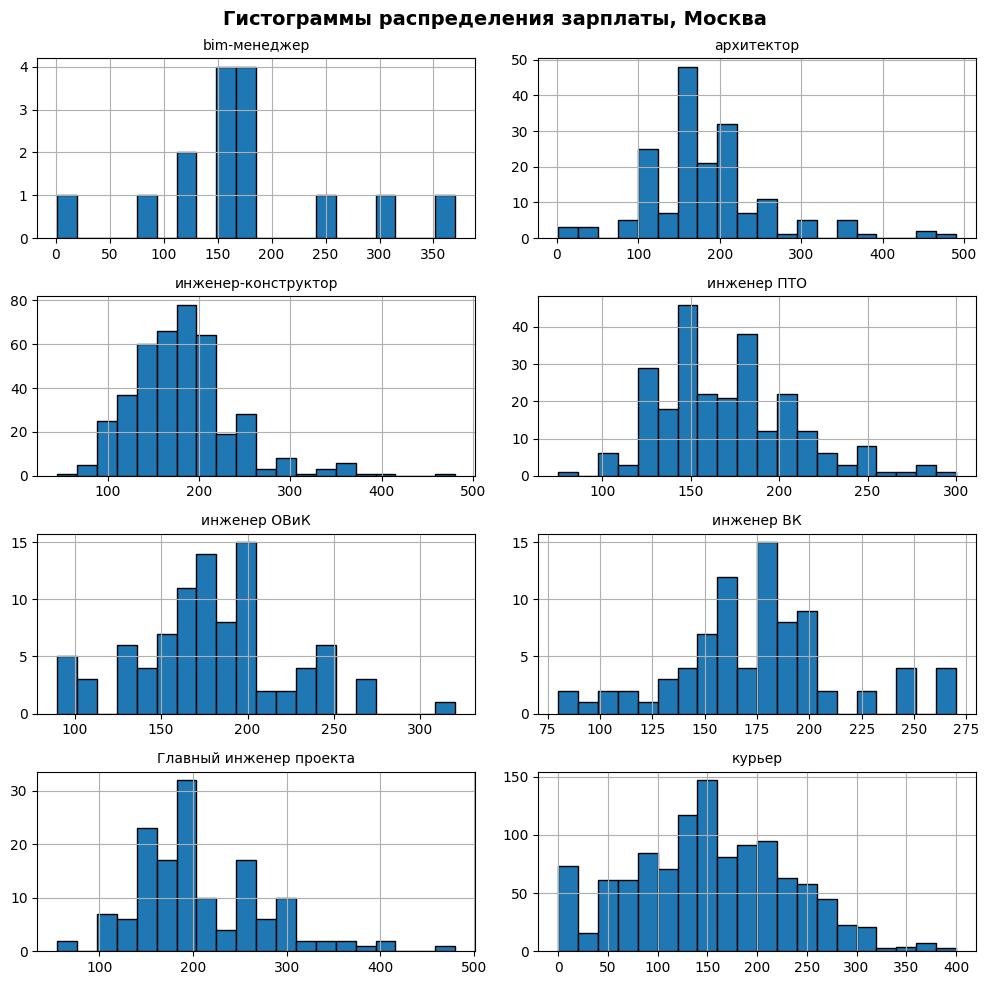

In [9]:
def plot_subhist(df, title = 'Гистограммы распределения зарплаты'):
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
    fig.suptitle(title, fontsize=14, fontweight='bold')
    axes = axes.flatten()
    plot_idx = 0
    for vacancy in df['Запрос'].unique():
        df_: pd.DataFrame= df[df['Запрос'] == vacancy]
        df_.hist(ax = axes[plot_idx], column='ЗП', bins=20, figsize=(10, 5), edgecolor='black')
        axes[plot_idx].set_title(vacancy, fontsize=10)
        plot_idx+=1
    plt.tight_layout(rect=(0, 0, 1, 1))
df_for_hist = df_selary_all[df_selary_all['Дата'] == '2025-12-27']
plot_subhist(df_for_hist)
plot_subhist(df_for_hist [df_for_hist['Город']=='Санкт-Петербург'], 'Гистограммы распределения зарплаты, Санкт-Петербург')
plot_subhist(df_for_hist [df_for_hist['Город']=='Москва'], 'Гистограммы распределения зарплаты, Москва')
    

array([[<Axes: title={'center': 'ЗП'}>]], dtype=object)

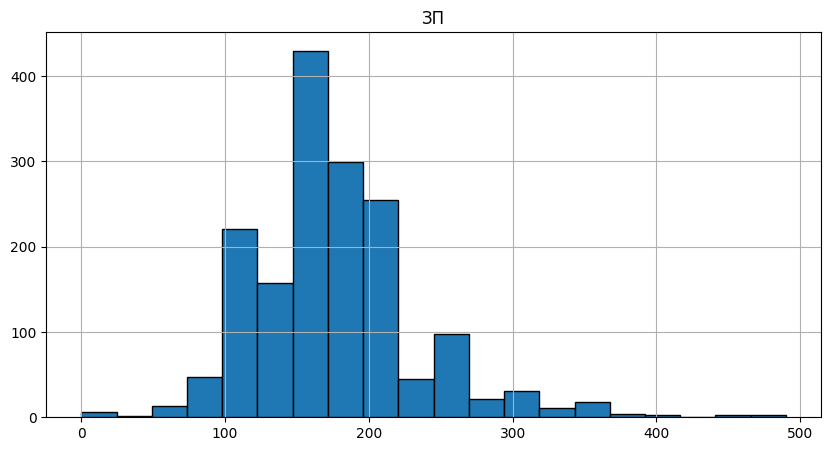

In [15]:
df_for_hist = df_for_hist[df_for_hist['Запрос'] != 'курьер']
df_for_hist.hist(column='ЗП', bins=20, figsize=(10, 5), edgecolor='black')